# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다.
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다.
    * 여러분은 이 프로젝트팀에 DX 컨설턴트로써 데이터분석을 맡았습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!
----
* 반복되는 코드는 함수로 만듭시다!
    * 함수를 만드는 순서
        * 먼저 절차대로 코드를 작성해서 실행한다.
        * 실행된 코드(오류가 없는 코드)를 가져다 함수로 구성한다.
            * 입력과 출력 결정

# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

In [20]:
def eda_1_n(data, var, bins = 30) :
    display(data[[var]].describe().T)
    print()

    plt.figure(figsize = (6,6))
    plt.subplot(2,1,1)
    sns.histplot(x=data[var], bins = 20, kde = True)

    plt.subplot(2,1,2)
    sns.boxplot(x=data[var])

    plt.tight_layout()
    plt.show()

## (1) Sales (Target)

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량 및 분포 확인

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


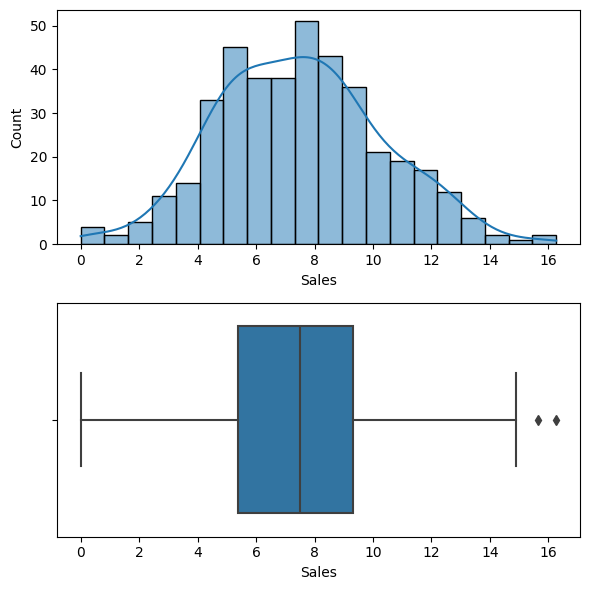

In [21]:
# 각 지역 판매량
eda_1_n(data, 'Sales')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이
* 어느 지역에서 판패량이 팔렸는지
* 판매량이 왜 0인 지역이 있을까

4) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.
* 소득 수준을 확인이 필요
* 지역의 인구수 확인 필요

## (2) CompPrice

1) 변수의 비즈니스 의미

* 경쟁사의 가격 (달러)
* feature

2) 기초통계량 및 분포 확인

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


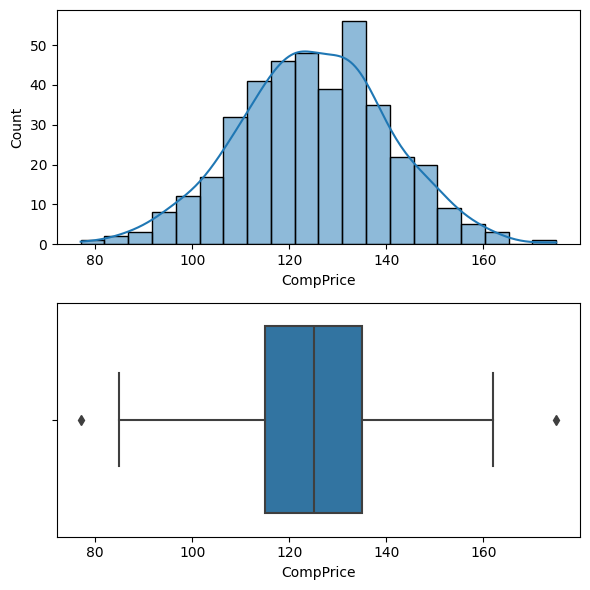

In [22]:
# 경쟁사 가격
eda_1_n(data, 'CompPrice')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 115 달러 ~ 135달러가 대부분
* 115 달러 ~ 135달러 사이에 가격대가 형성된 이유

4) 추가 분석해 볼 사항이 있나요?

* 지역의 소득 확인 필요
* 도심 여부

## (3) Income

1) 변수의 비즈니스 의미

* 지역평균 소득 (단위 : 1000달러)
* feature

2) 기초통계량 및 분포 확인

        count     mean        std   min    25%   50%   75%    max
Income  400.0  68.6575  27.986037  21.0  42.75  69.0  91.0  120.0



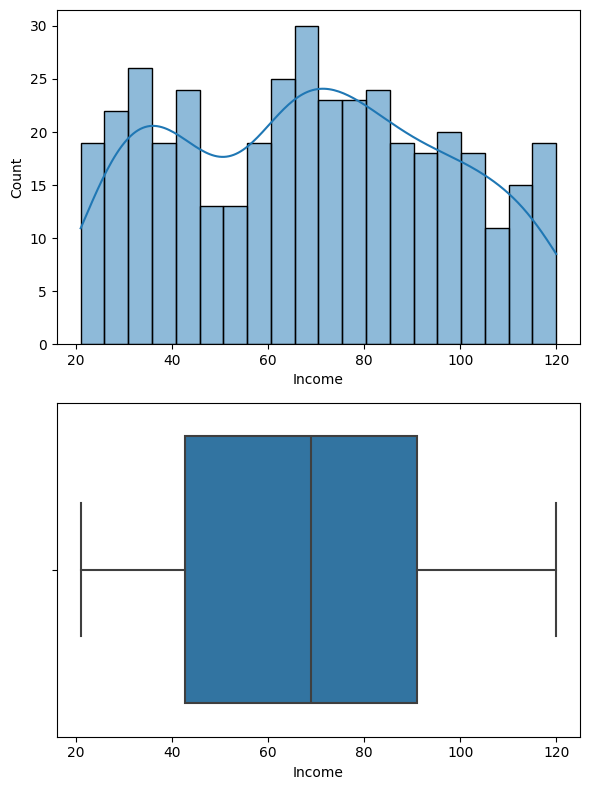

In [9]:
# 지역 평균 소득
eda_1_n(data, 'Income')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분 4만 ~ 9만 달러
* 도심에 사는 사람들이 더 많은 소득이 있는가

4) 추가 분석해 볼 사항이 있나요?

* 상/중/하 계층에 따라 판매량이 달라질까?

## (4) Advertising

1) 변수의 비즈니스 의미

* 각 지역, 회사의 광고 예산(단위 : 1000달러)
* feature

2) 기초통계량 및 분포 확인

             count   mean       std  min  25%  50%   75%   max
Advertising  400.0  6.635  6.650364  0.0  0.0  5.0  12.0  29.0



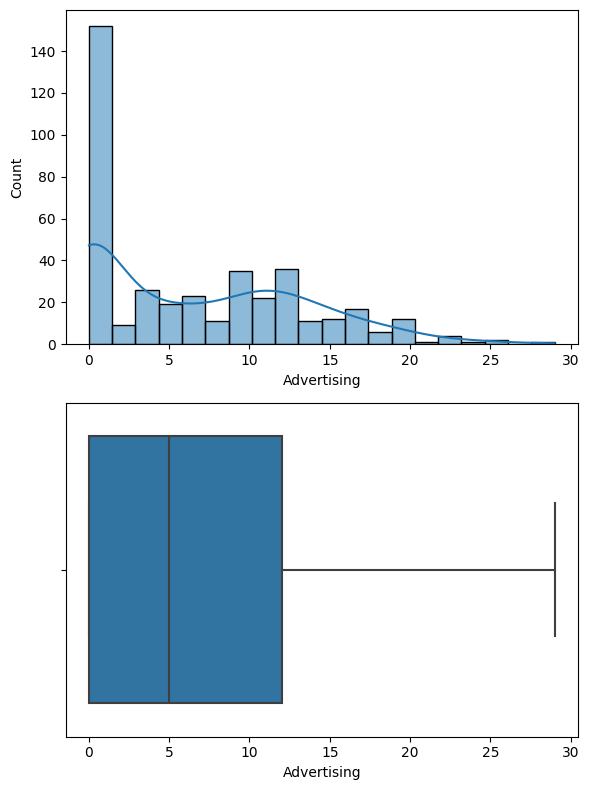

In [16]:
# 각 지역, 회사의 광고 예산
eda_1_n(data, 'Advertising')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 0 ~ 13에 대부분
* 광고애 따라 판매량이 달라질까?
* 어느 수준에 광고료를 써야 적당할까?

4) 추가 분석해 볼 사항이 있나요?

* 광고료에 따른 판매량이 증가하는가?

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


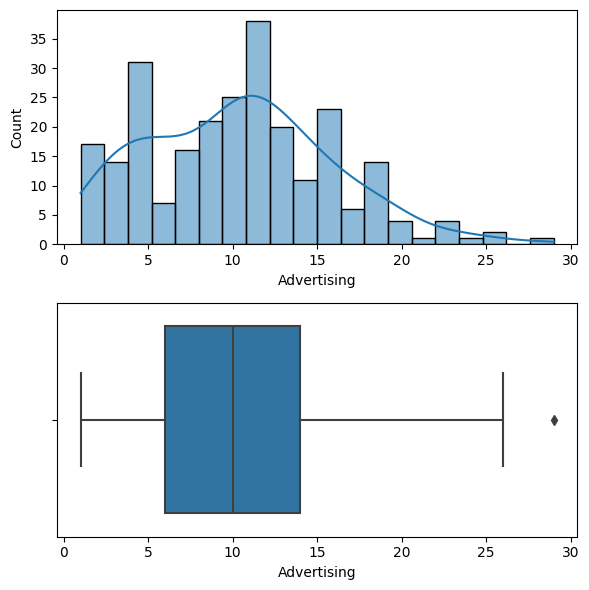

In [35]:
temp = data.loc[data['Advertising'] > 0] 
eda_1_n(temp, 'Advertising')

## (5) Population

1) 변수의 비즈니스 의미

* 지역 인구수(단위 : 1000명)
* feature

2) 기초통계량 및 분포 확인

,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


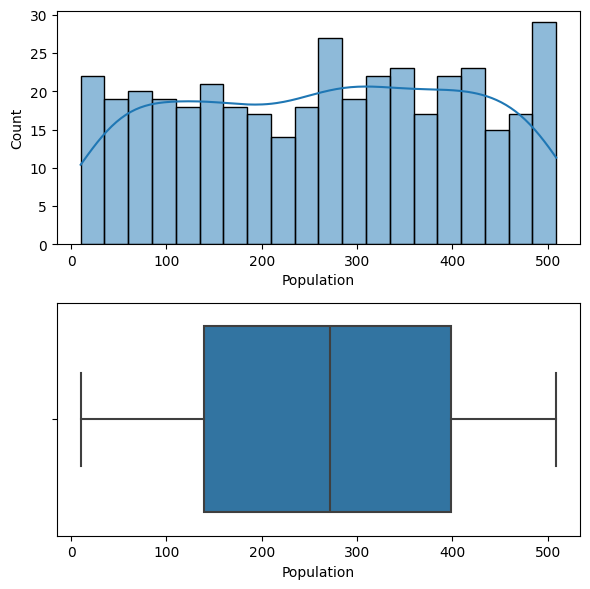

In [31]:
# 지역 인구수
eda_1_n(data, 'Population')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 14만 ~ 40만명이 대부분분
* 인구가 고르게 분배 되어 있음
* 인구 수에 따라 판매량이 어떠한가

4) 추가 분석해 볼 사항이 있나요?

* 지역별 인구에 따른 판매량 

## (6) Price

1) 변수의 비즈니스 의미

* 자사 지역별 판매가격
* feature

2) 기초통계량 및 분포 확인

       count     mean        std   min    25%    50%    75%    max
Price  400.0  115.795  23.676664  24.0  100.0  117.0  131.0  191.0



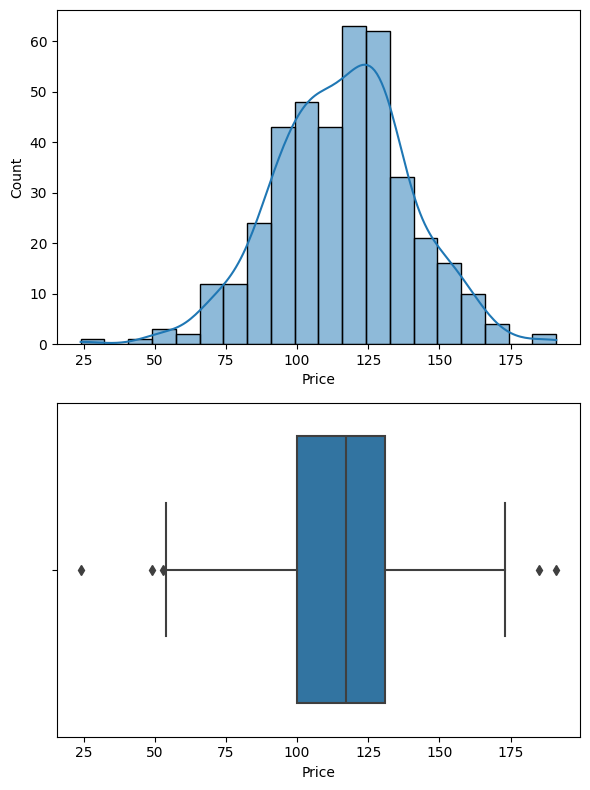

In [13]:
# 자사 지역별 판매가격
eda_1_n(data, 'Price')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 90 ~ 130이 대부분
* 어느 지역에 가장 많이 팔려을까
* 어느 지역에 가장 비싸게 팔거나 싸게 팔까

4) 추가 분석해 볼 사항이 있나요?

* 자사 가격 타사가격 비교

In [29]:
# 타사는 가격 변동 폭이 작고 가격이 높다. # 자신들만의 것이 있을지도..?
# 자사는 가격이 낮고 가격 변동 폭이 있어 홍보에 따라 판매량이 좋을지도..?

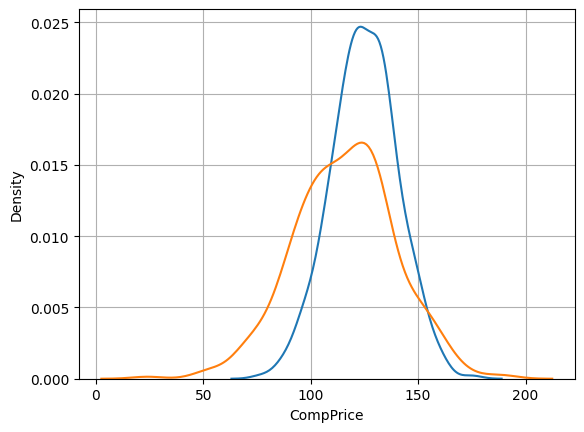

In [27]:
sns.kdeplot(x = 'CompPrice', data = data) 
sns.kdeplot(x = 'Price', data = data) 
plt.grid()
plt.show()

## (7) Age

1) 변수의 비즈니스 의미

* 지역 인구의 평균 연령
* feature

2) 기초통계량 및 분포 확인

,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


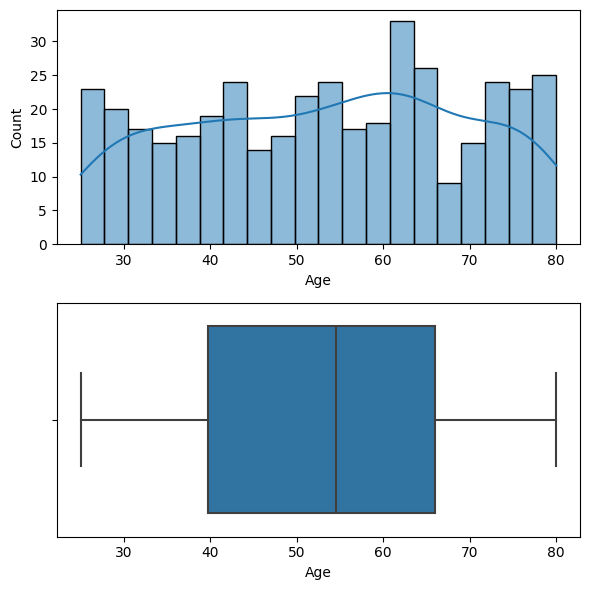

In [32]:
# 지역 인구의 평균 연령
eda_1_n(data, 'Age')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 40세 ~60세 대부분
* 젊은 사람이 많을 수록 많이 팔릴까?
* 나이가 많은 사람 일수록 많이 팔릴까? 
* 나이에 따른 소득에 따라 판매량이 증가할까?

4) 추가 분석해 볼 사항이 있나요?

* 출산률에 따라 판매량이 달라질까?
* 자동차 소유에 따라 판매량이 달라질까?

# 4.단변량분석 : 범주형 변수

In [33]:
# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    # 기초 통계량
    print(f' <<<  {var}   >>')
    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)
    # 시각화
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

## (1) Urban

1) 변수의 비즈니스 의미

* 도심 지역 여부

2) 기초통계량 및 분포 확인

 <<<  Urban   >>


,Class,Count,Prop
0,Yes,282,0.705
1,No,118,0.295


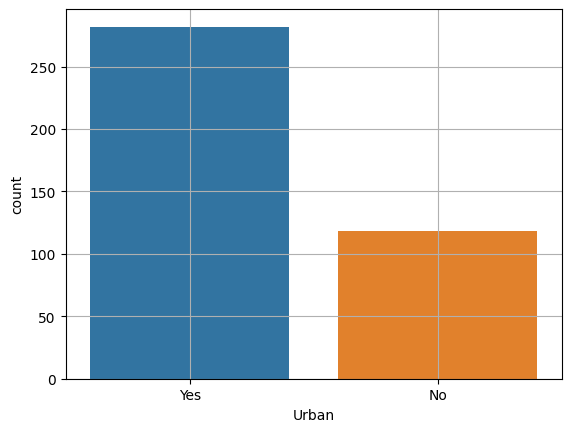

In [34]:
var = 'Urban'
eda_1_c(data, var)

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 70% 매장이 도시에 있음

4) 추가 분석해 볼 사항이 있나요?

* 도시와 지방의 인구수, 소득수준, 자사 가격, 경쟁사 가격, 광고예산, 판매량 비교 필요.

## (2) ShelveLoc

1) 변수의 비즈니스 의미

* 진열상태
* feature

2) 기초통계량 및 분포 확인

 <<<  ShelveLoc   >>


,Class,Count,Prop
0,Medium,219,0.5475
1,Bad,96,0.2400
2,Good,85,0.2125


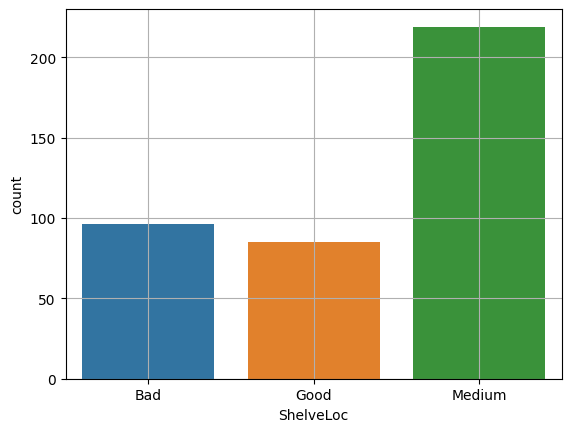

In [36]:
eda_1_c(data, 'ShelveLoc')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 Medium 54% 
* Bad, Good이 합하여 56%
* 진열 상태에 따라 판매량이 어떨까?
* 지역에 따라 진열 상태가 어떨까?
* 진열 상태에 따라 고객 연령대가 어떨까?
* 매장 관리가 되지 않는 지역은 어딜까?

4) 추가 분석해 볼 사항이 있나요?

* 진열 상태에 따른 광고예산
* 연령대에 따른 고객 증가?
* 진열 상태 평가 기준

## (3) US

1) 변수의 비즈니스 의미

* 매장이 미국에 있는지 여부(Yes,No)
* feature

2) 기초통계량 및 분포 확인

 <<<  US   >>


,Class,Count,Prop
0,Yes,258,0.645
1,No,142,0.355


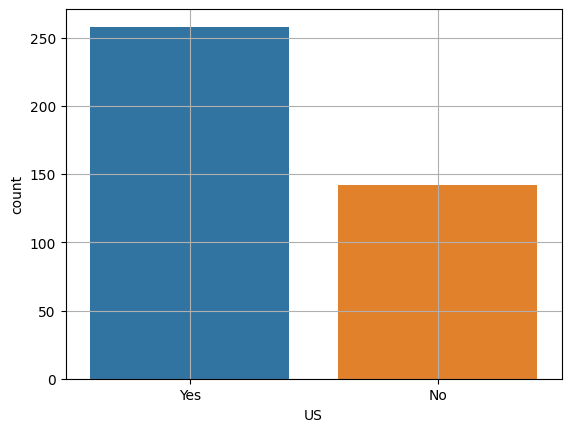

In [37]:
eda_1_c(data, 'US')

3) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 미국 내에 매장이 64%
* 미국, 해외 매장 판매량 및 판매가격 차이
* 미국, 해외 매장 구매 연령대

4) 추가 분석해 볼 사항이 있나요?

* 해외 지사에 있는 매장의 진열 상태, 광고예산, 연령대, 판매량